In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

## RESULTS USING THE SIGNAL OF DONE

In [2]:
env='MountainCarContinuous-v0'
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data_using_done/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER-DDPG"
print(df_comper.shape)

(2150, 17)


In [3]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data_using_done/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
print(df_ddpg.shape)

(2059, 17)


In [4]:
df_comper.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,MountainCarContinuous-v0,12-09-2023 21:27:33,200,0,191,0.009941,1,201,False,-1.169679,-1.169679,-1.169679,-1.169679,-1.169679,COMPER-DDPG
1,1,2,MountainCarContinuous-v0,12-09-2023 21:35:10,400,0,380,0.019882,1,401,False,-1.480935,-1.325307,-1.325307,-1.325307,-1.325307,COMPER-DDPG
2,1,3,MountainCarContinuous-v0,12-09-2023 21:42:47,600,0,564,0.029822,1,601,False,-2.088349,-1.579654,-1.579654,-1.579654,-1.579654,COMPER-DDPG
3,1,4,MountainCarContinuous-v0,12-09-2023 21:50:37,800,0,720,0.039763,1,801,False,-2.483504,-1.805617,-1.805617,-1.805617,-1.805617,COMPER-DDPG
4,1,5,MountainCarContinuous-v0,12-09-2023 21:58:15,1000,0,890,0.049704,1,1001,False,-4.329440,-2.310381,-2.310381,-2.310381,-2.310381,COMPER-DDPG


In [5]:
df_ddpg.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,MountainCarContinuous-v0,03-10-2023 15:11:02,200,96,0,0.009941,1,201,False,-0.886030,-0.886030,-0.886030,-0.886030,-0.886030,DDPG
1,1,2,MountainCarContinuous-v0,03-10-2023 15:11:28,400,185,0,0.019882,1,401,False,-2.731218,-1.808624,-1.808624,-1.808624,-1.808624,DDPG
2,1,3,MountainCarContinuous-v0,03-10-2023 15:11:55,600,275,0,0.029822,1,601,False,-3.107946,-2.241731,-2.241731,-2.241731,-2.241731,DDPG
3,1,4,MountainCarContinuous-v0,03-10-2023 15:12:22,800,317,0,0.039763,1,801,False,-3.694801,-2.604999,-2.604999,-2.604999,-2.604999,DDPG
4,1,5,MountainCarContinuous-v0,03-10-2023 15:12:49,1000,349,0,0.049704,1,1001,False,-4.229462,-2.929891,-2.929891,-2.929891,-2.929891,DDPG


In [6]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,MountainCarContinuous-v0,12-09-2023 21:27:33,200,0,191,0.009941,1,201,False,-1.169679,-1.169679,-1.169679,-1.169679,-1.169679,COMPER-DDPG
1,1,2,MountainCarContinuous-v0,12-09-2023 21:35:10,400,0,380,0.019882,1,401,False,-1.480935,-1.325307,-1.325307,-1.325307,-1.325307,COMPER-DDPG
2,1,3,MountainCarContinuous-v0,12-09-2023 21:42:47,600,0,564,0.029822,1,601,False,-2.088349,-1.579654,-1.579654,-1.579654,-1.579654,COMPER-DDPG
3,1,4,MountainCarContinuous-v0,12-09-2023 21:50:37,800,0,720,0.039763,1,801,False,-2.483504,-1.805617,-1.805617,-1.805617,-1.805617,COMPER-DDPG
4,1,5,MountainCarContinuous-v0,12-09-2023 21:58:15,1000,0,890,0.049704,1,1001,False,-4.329440,-2.310381,-2.310381,-2.310381,-2.310381,COMPER-DDPG


In [7]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
246,5,247,MountainCarContinuous-v0,04-10-2023 00:15:45,49200,15979,0,0.999,2,9936,False,-159.297384,-225.415867,-262.224560,-71.862668,-133.669135,DDPG
247,5,248,MountainCarContinuous-v0,04-10-2023 00:16:11,49400,15983,0,0.999,2,10136,False,-161.179071,-225.156848,-259.923544,-74.989636,-139.346456,DDPG
248,5,249,MountainCarContinuous-v0,04-10-2023 00:16:37,49600,15985,0,0.999,2,10336,False,-162.441780,-224.904980,-257.627073,-78.035952,-145.087001,DDPG
249,5,250,MountainCarContinuous-v0,04-10-2023 00:17:03,49800,16027,0,0.999,2,10536,False,-165.686367,-224.668106,-255.361442,-81.063723,-150.866840,DDPG
250,5,251,MountainCarContinuous-v0,04-10-2023 00:17:28,50000,16169,0,0.999,2,10736,True,-174.670526,-224.468912,-253.179333,-84.153550,-156.905478,DDPG


<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

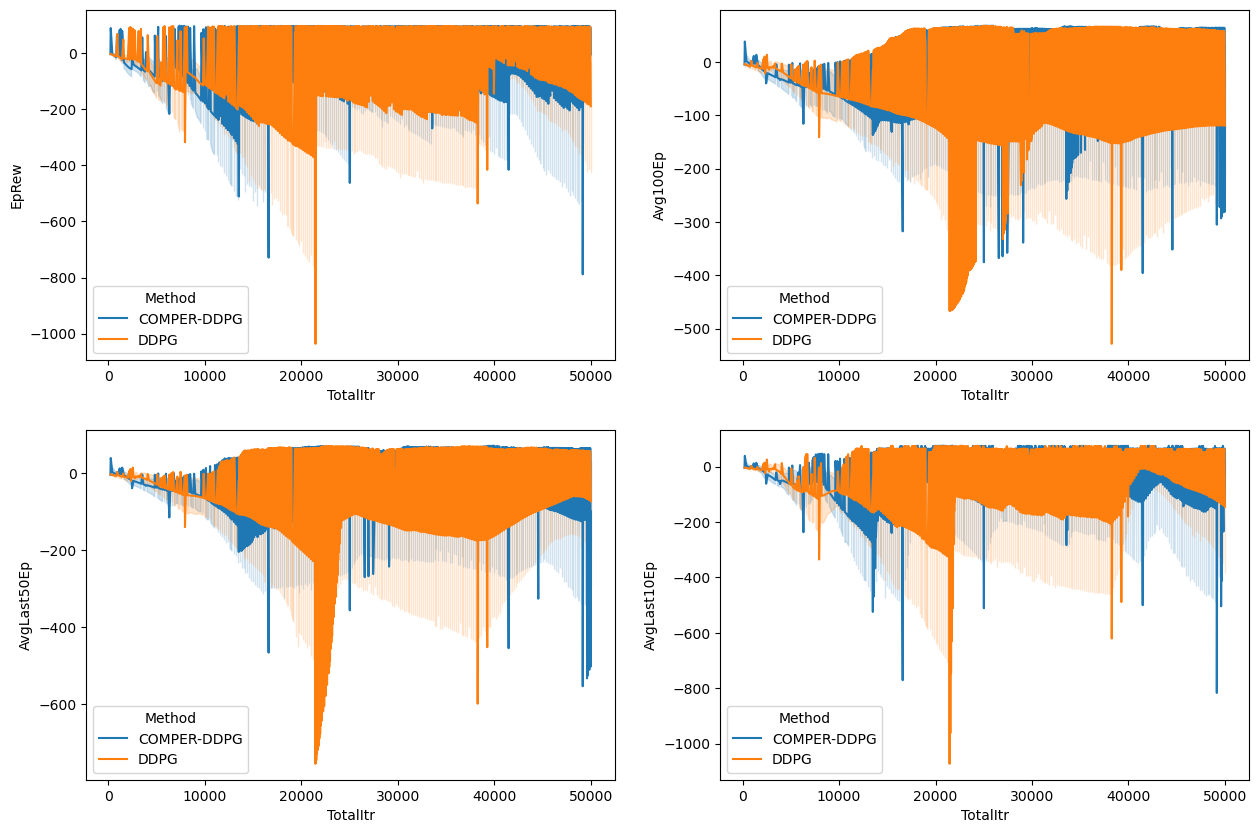

In [8]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])


In [9]:
path ='COMPER_DDPG/data_using_done/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER-DDPG"
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,13-09-2023 00:37:51,MountainCarContinuous-v0,5000,-0.002435,COMPER-DDPG
1,1,13-09-2023 03:59:29,MountainCarContinuous-v0,10000,-0.000137,COMPER-DDPG
2,1,13-09-2023 07:23:37,MountainCarContinuous-v0,15000,-0.000136,COMPER-DDPG
3,1,13-09-2023 10:50:36,MountainCarContinuous-v0,20000,-0.000083,COMPER-DDPG
4,1,13-09-2023 14:16:39,MountainCarContinuous-v0,25000,-0.000164,COMPER-DDPG


In [10]:
path ='DPPG/data_using_done/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,03-10-2023 15:21:13,MountainCarContinuous-v0,5000,-0.031264,DDPG
1,1,03-10-2023 15:31:59,MountainCarContinuous-v0,10000,-0.008570,DDPG
2,1,03-10-2023 15:42:46,MountainCarContinuous-v0,15000,-0.000978,DDPG
3,1,03-10-2023 15:53:49,MountainCarContinuous-v0,20000,-0.001195,DDPG
4,1,03-10-2023 16:04:54,MountainCarContinuous-v0,25000,-0.000072,DDPG


In [11]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

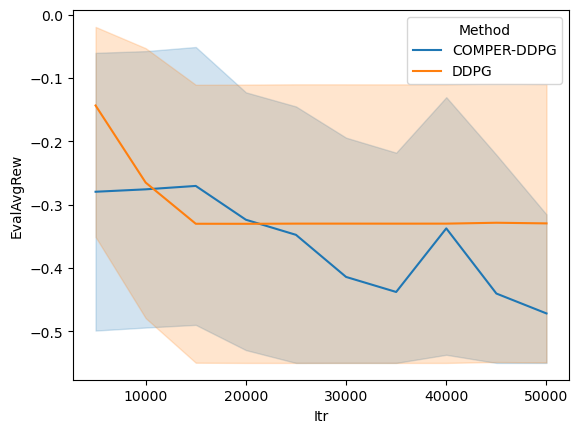

In [12]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')

## USING ROLLING AVERAGE

In [13]:
df_comper_rolling_avg = pd.DataFrame(df_comper[["TotalItr","EpRew","Method"]])
df_comper_rolling_avg["EpRewRolling"]=df_comper_rolling_avg['EpRew'].rolling(100).mean()
df_comper_rolling_avg.dropna(inplace=True)
df_comper_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,20000,-270.931678,COMPER-DDPG,-131.071602
100,20200,-271.988001,COMPER-DDPG,-133.779785
101,20400,-272.833587,COMPER-DDPG,-136.493311
102,20600,-273.631443,COMPER-DDPG,-139.208742
103,20800,-275.745171,COMPER-DDPG,-141.941359


In [14]:
df_ddpg_rolling_avg=pd.DataFrame(df_ddpg[["TotalItr","EpRew","Method"]])
df_ddpg_rolling_avg["EpRewRolling"]=df_ddpg_rolling_avg["EpRew"].rolling(100).mean()
df_ddpg_rolling_avg.dropna(inplace=True)
df_ddpg_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,20000,-413.868835,DDPG,-203.917559
100,20200,-413.899070,DDPG,-208.047689
101,20400,-414.047415,DDPG,-212.160851
102,20600,-416.912915,DDPG,-216.298901
103,20800,-419.419068,DDPG,-220.456143


In [15]:
df_rolling=pd.concat([df_comper_rolling_avg,df_ddpg_rolling_avg])
df_rolling.head()

,TotalItr,EpRew,Method,EpRewRolling
99,20000,-270.931678,COMPER-DDPG,-131.071602
100,20200,-271.988001,COMPER-DDPG,-133.779785
101,20400,-272.833587,COMPER-DDPG,-136.493311
102,20600,-273.631443,COMPER-DDPG,-139.208742
103,20800,-275.745171,COMPER-DDPG,-141.941359


In [16]:
df_rolling.tail()

,TotalItr,EpRew,Method,EpRewRolling
246,49200,-159.297384,DDPG,-262.224560
247,49400,-161.179071,DDPG,-259.923544
248,49600,-162.441780,DDPG,-257.627073
249,49800,-165.686367,DDPG,-255.361442
250,50000,-174.670526,DDPG,-253.179333


<Axes: xlabel='TotalItr', ylabel='EpRewRolling'>

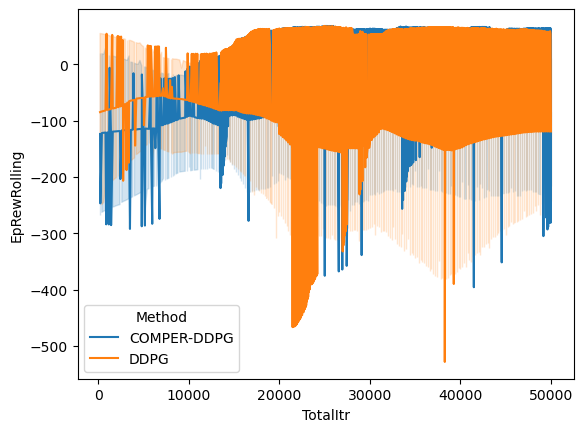

In [17]:
fig = plt.Figure()
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df_rolling, x="TotalItr", y="EpRewRolling",hue='Method')

In [18]:
df_comper_eval_rolling_avg = pd.DataFrame(df_comper_eval[["Int","EvalAvgRew","Method"]])
df_comper_eval_rolling_avg["EpRewRolling"]=df_comper_eval["EvalAvgRew"].rolling(2).mean()
df_comper_eval_rolling_avg.dropna(inplace=True)
df_comper_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,-0.000137,COMPER-DDPG,-0.001286
2,15000,-0.000136,COMPER-DDPG,-0.000136
3,20000,-0.000083,COMPER-DDPG,-0.000109
4,25000,-0.000164,COMPER-DDPG,-0.000123
5,30000,-0.000142,COMPER-DDPG,-0.000153


In [19]:
df_ddpg_eval_rolling_avg = pd.DataFrame(df_ddpg_eval[["Int","EvalAvgRew","Method"]])
df_ddpg_eval_rolling_avg["EpRewRolling"]=df_ddpg_eval["EvalAvgRew"].rolling(2).mean()
df_ddpg_eval_rolling_avg.dropna(inplace=True)
df_ddpg_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,-0.008570,DDPG,-0.019917
2,15000,-0.000978,DDPG,-0.004774
3,20000,-0.001195,DDPG,-0.001086
4,25000,-0.000072,DDPG,-0.000633
5,30000,-0.000151,DDPG,-0.000111


<Axes: xlabel='Int', ylabel='EpRewRolling'>

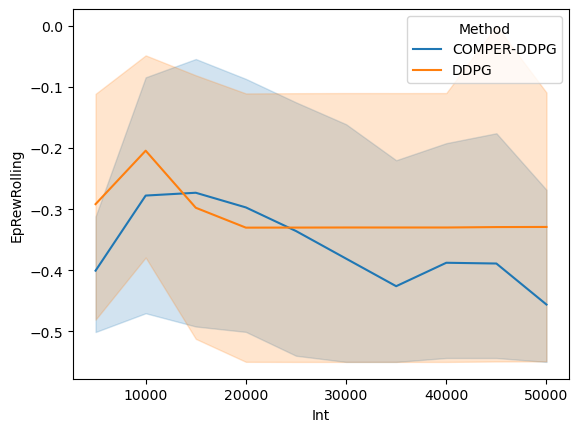

In [20]:
df_eval_rolling=pd.concat([df_comper_eval_rolling_avg,df_ddpg_eval_rolling_avg])
sns.lineplot(data=df_eval_rolling, x="Int", y="EpRewRolling",hue='Method')

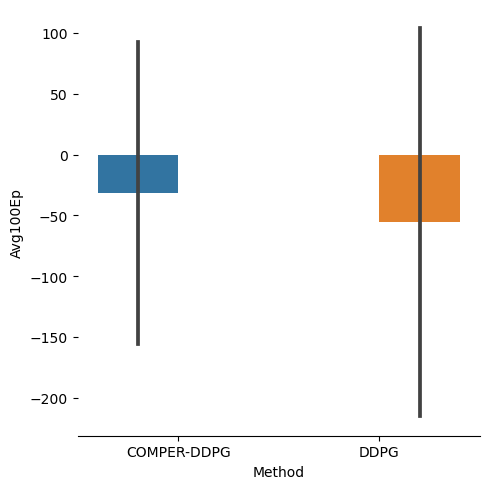

In [21]:
g = sns.catplot(data=df, kind="bar",x="Method", y="Avg100Ep", hue="Method",
    errorbar="sd")
g.despine(left=True)

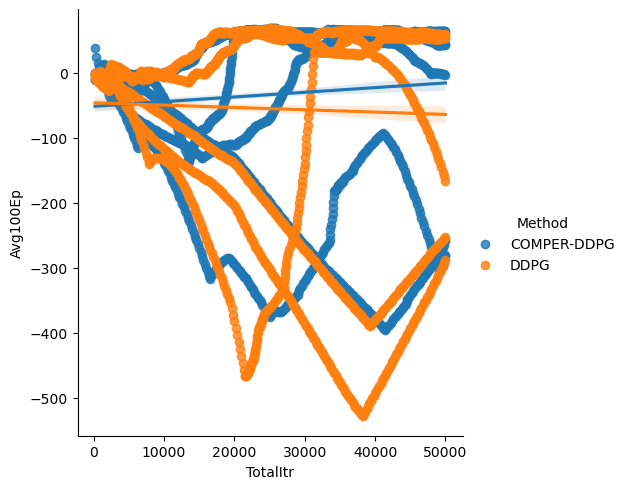

In [22]:
g = sns.lmplot(
    data=df,
    x="TotalItr", y="Avg100Ep", hue="Method",
    height=5
)